### 1) Apply below Support Vector Classifiers on the breast cancer dataset from Assignment 1. Perform grid
### search on relevant parameters and report on the performance metrics.
a) Linear SCV
b) Polynomial SVC
c) Radial Basis Function SVC
d) How does the best performing SVM compare to previous models from assignments 1 and 2. Report on
comparative metrics in a tabular format. 

In [2]:
import numpy as np
import folium
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import timeit
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import cartopy
import cartopy.crs as ccrs
from sklearn.neighbors import KernelDensity
from sklearn.kernel_ridge import KernelRidge


In [3]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
data.columns=['ID', 'Type_of_Cancer', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30']

In [4]:
data.head()

,ID,Type_of_Cancer,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
x = data.drop(['ID', 'Type_of_Cancer'], axis=1)
x.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = data['Type_of_Cancer'] 
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Type_of_Cancer, Length: 569, dtype: object

In [7]:
new_y = []
for row in y:
    new_y.append(1 if row[0] =='M' else 0)
    

In [8]:
new_y2 = np.array(new_y)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, new_y2, test_size=0.2, random_state=50)

In [10]:
x.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# We first need to normalize x-training
x_train_min = x_train.min()
x_train_max = x_train.max()
x_train_range = x_train_max - x_train_min
x_train_scaled = (x_train - x_train_min)/x_train_range
x_train_scaled

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
345,0.155190,0.169090,0.154861,0.075546,0.359897,0.221489,0.083903,0.101243,0.289394,0.423126,...,0.104945,0.198827,0.101997,0.042248,0.428119,0.132249,0.057204,0.140000,0.171136,0.194826
107,0.254579,0.298613,0.243383,0.137094,0.220636,0.149592,0.061926,0.095477,0.273737,0.225358,...,0.190679,0.412313,0.175059,0.088208,0.311893,0.163974,0.154712,0.290103,0.279377,0.109265
16,0.364381,0.352384,0.352083,0.229480,0.358410,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.155048,0.232748,0.552921,0.288446,0.176965
361,0.299068,0.401082,0.286435,0.170774,0.231044,0.136035,0.078351,0.120477,0.381313,0.147430,...,0.223052,0.457889,0.211813,0.107157,0.282837,0.135256,0.096805,0.192921,0.211159,0.074660
353,0.383312,0.542103,0.374611,0.243097,0.395381,0.240200,0.289363,0.325696,0.296465,0.309183,...,0.376379,0.565032,0.352557,0.212544,0.626230,0.202103,0.321805,0.524399,0.214511,0.257207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.565999,0.392289,0.551517,0.418452,0.273367,0.256181,0.253046,0.395179,0.263636,0.097936,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194203,0.070129
132,0.434427,0.400068,0.431276,0.282630,0.379522,0.334397,0.244377,0.278976,0.555556,0.188500,...,0.410530,0.523987,0.394890,0.243266,0.451232,0.269921,0.238978,0.450859,0.377366,0.137763
289,0.207724,0.310450,0.196116,0.107105,0.244028,0.094166,0.056209,0.108002,0.481313,0.201980,...,0.157595,0.376333,0.143832,0.067366,0.268309,0.067711,0.060136,0.213162,0.335371,0.096723
109,0.206304,0.390599,0.198259,0.107317,0.248588,0.142231,0.120267,0.094384,0.215657,0.322873,...,0.180719,0.456557,0.167239,0.081818,0.651984,0.186580,0.249201,0.284467,0.249014,0.217414


In [12]:
# Normalizing the x-test
x_test_min = x_test.min()
x_test_max = x_test.max()
x_test_range = x_test_max - x_test_min
x_test_scaled = (x_test - x_test_min)/x_test_range
x_test_scaled

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
356,0.313574,0.305657,0.316125,0.199398,0.744208,0.431178,0.301129,0.372540,0.577532,0.452906,...,0.235386,0.309372,0.244818,0.118001,0.467658,0.314533,0.284813,0.468529,0.387678,0.300663
556,0.142264,0.351277,0.142966,0.078735,0.638409,0.183615,0.015757,0.074202,0.384494,0.400062,...,0.071936,0.243198,0.066387,0.033700,0.389313,0.105713,0.011125,0.083128,0.174555,0.132322
283,0.502667,0.313869,0.517775,0.375964,0.722780,0.653877,0.610850,0.601862,0.451741,0.509792,...,0.436698,0.317434,0.466197,0.270012,0.489755,0.607854,0.556343,0.645065,0.301778,0.547884
495,0.421458,0.379562,0.409934,0.301145,0.579081,0.221224,0.213986,0.329189,0.143987,0.218837,...,0.319420,0.431307,0.310392,0.184502,0.340096,0.132639,0.188178,0.378771,0.201352,0.117037
364,0.334321,0.230839,0.319442,0.223735,0.358109,0.102764,0.068391,0.097939,0.272943,0.204228,...,0.260320,0.203561,0.241702,0.142990,0.337083,0.173888,0.150985,0.260223,0.294515,0.222103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.426200,0.259124,0.416142,0.299458,0.858042,0.431625,0.482596,0.573404,0.515823,0.364315,...,0.436698,0.194491,0.428939,0.249412,0.535958,0.243781,0.371375,0.620857,0.463060,0.175609
208,0.317131,0.485858,0.332540,0.209880,0.637070,0.511224,0.272970,0.339229,0.431171,0.704383,...,0.252008,0.454148,0.280450,0.134626,0.473684,0.564314,0.350011,0.419367,0.641873,0.561779
24,0.526971,0.432938,0.527981,0.435904,0.796438,0.499598,0.478206,0.609707,0.545886,0.399751,...,0.801921,0.534767,0.805582,0.679248,0.931699,0.446298,0.519703,0.780261,0.512898,0.433946
264,0.558980,0.464416,0.541589,0.450181,0.597697,0.250291,0.284133,0.433976,0.444620,0.166615,...,0.576600,0.459859,0.558325,0.409996,0.683608,0.301500,0.430485,0.738920,0.413474,0.220821


In [13]:
# N_estimators, will be the total of trees This will do the different parameters options for the Grid Search.
param_grid ={
            'C': [0.1, 1, 10, 100],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}
param_grid_poly= { 'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'degree' : [1, 2, 3, 4, 5]}

param_grid_linear= { 'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [14]:
def grid_srch(name):
    if name=="rbf": 
        search = GridSearchCV(svm.SVC(kernel=name), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    elif name=="poly":
        search = GridSearchCV(svm.SVC(kernel=name), param_grid_poly, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    else:
        search = GridSearchCV(svm.SVC(kernel=name), param_grid_linear, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    search.fit(x_train_scaled, y_train)
    
    best_parameters = search.best_params_
    
    return best_parameters



In [15]:
grid_srch("rbf")

{'C': 1, 'gamma': 1}

In [16]:
grid_srch("poly")

{'C': 1, 'degree': 2}

In [17]:
grid_srch("linear")

{'C': 100}

In [18]:
def fit_predict_score(name,clf):
    clf.fit(x_train_scaled, np.ravel(y_train))
    predicted = clf.predict(x_test_scaled)
    labels=[1, 0]
    cm =  metrics.confusion_matrix(y_test, predicted, labels)
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm) 
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    fig.colorbar(cax) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test_scaled)[:,1])
    result_roc_auc= roc_auc_score(y_test, clf.predict(x_test_scaled))
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=name+ " (Sensitivity -%0.3f)" % result_roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.xlim([-0.1, 1.05])
    #Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()
    
    
    #Precision -Recall Curve in Python
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, clf.predict_proba(x_test_scaled)[:, 1])
    lr_f1, lr_auc = f1_score(y_test, predicted), auc(lr_recall, lr_precision)
    # summarize scores
    print(name + 'f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    plt.plot(lr_recall, lr_precision, marker='.', label=name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

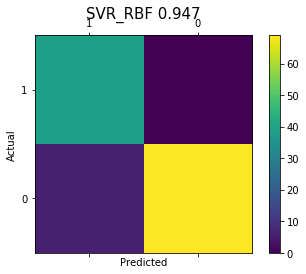

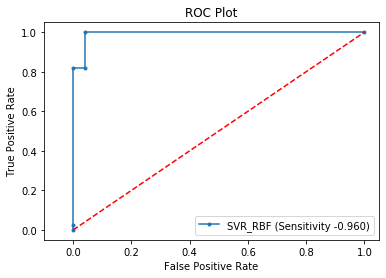

SVR_RBFf1=0.929 auc=0.986


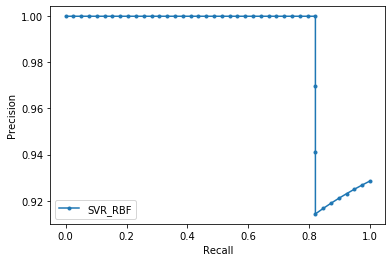

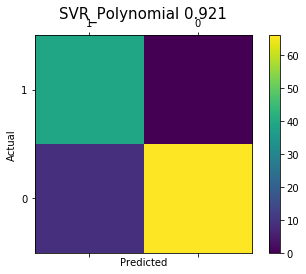

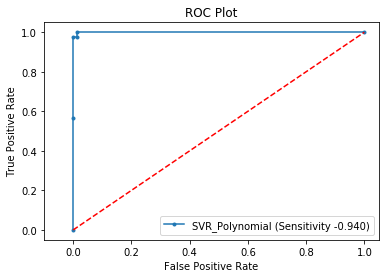

SVR_Polynomialf1=0.897 auc=0.999


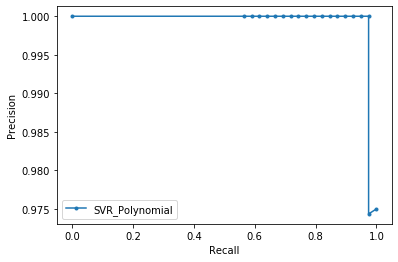

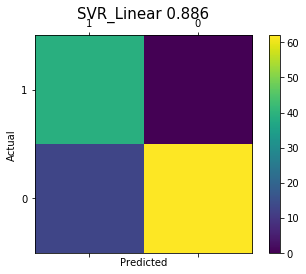

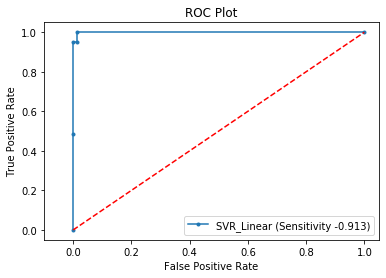

SVR_Linearf1=0.857 auc=0.999


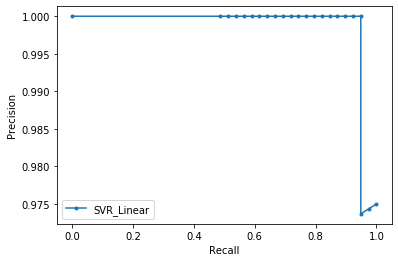

In [19]:
svc0= svm.SVC(C = 1,  gamma = 1, kernel='rbf', probability=1)
svc1 = svm.SVC(C= 1, degree= 2,  kernel='poly', probability=1)
svc2 = svm.SVC(C= 100, kernel='linear', probability=1)

names = ["SVR_RBF", "SVR_Polynomial", "SVR_Linear"]
SVC = [svc0, svc1, svc2]

for name, svc in zip(names, SVC):
    fit_predict_score(name,svc)

### The best Support Vector Classifiers from the 3 of them is RBF which gave us an accuracy of 94.7% and has a F-1 Score of around 92.9%. 

In [20]:
comp = {'Method': ['SCV - RBF','Logistic Regression','Decision Tree','Random Forest', 'Gradient Boosting Class.'],
        'Accuracy': [0.947, 0.947, 0.921, 0.947, 0.939 ],
        'Sensitivity':[ 0.96, 0.935, 0.928, 0.942, 0.941],
        'F-1 Score':[0.929, 0.921, 0.892, 0.923, 0.914],
        'AUC':[0.986, 0.983, 0.904, 0.99, 0.991 ]}

df = pd.DataFrame(comp, columns = ['Method', 'Accuracy', "Sensitivity", 'F-1 Score', "AUC"])
df

,Method,Accuracy,Sensitivity,F-1 Score,AUC
0,SCV - RBF,0.947,0.960,0.929,0.986
1,Logistic Regression,0.947,0.935,0.921,0.983
2,Decision Tree,0.921,0.928,0.892,0.904
3,Random Forest,0.947,0.942,0.923,0.990
4,Gradient Boosting Class.,0.939,0.941,0.914,0.991


### From all the methods, the best one is SVC-RBF since it has the best accuracy and sensitivity score. The second best one wil be Random Forest due that it has the same acuracy scorde as SVC - RBF, however it has a lower sensitivity than SVC - RBF. We want a high sensitive model, so it identifies correctly identifeis those patients with the disease.

## 2) Collect data for Covid-19 cases with lat-long information and time/date data for any city or state.
a) Visualize the distribution using Kernel Density Estimation on the map of the city.

b) Try different kernels and bandwidth values and summarize observations.
Bonus points for animated visualization of changes over time.

In [21]:
#For this Assignment I have used my country, Panama, and the city is Panama City which has same Lat and Lng throughout the entire time.
pty = pd.read_csv('Panama_COVID19.csv')

In [22]:
pty.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Panama,Panama,8.538,-80.7821,1/22/20,0,0,0
1,Panama,Panama,8.538,-80.7821,1/23/20,0,0,0
2,Panama,Panama,8.538,-80.7821,1/24/20,0,0,0
3,Panama,Panama,8.538,-80.7821,1/25/20,0,0,0
4,Panama,Panama,8.538,-80.7821,1/26/20,0,0,0


In [23]:
latlon = np.vstack([pty['Lat'],
                    pty['Long']]).T

confirmed = np.array(pty['Confirmed'], dtype='int')
deaths = np.array(pty['Deaths'], dtype='int')
recov= np.array(pty['Recovered'], dtype='int')

In [24]:
import folium

panama = folium.Map(location=[8, -80], zoom_start=5, max_zoom = 8, height=500, width ="80%")

for i in range(0,len(confirmed)):
    folium.Circle(
        location=[pty.iloc[i]['Lat'], pty.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+pty.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(pty.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "</ul>", radius=(int((np.log2(pty.iloc[i]['Confirmed']+1)))+0.2)*5000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(panama)

panama

### 3) Apply below kernel regression models on the time series that predicts future Covid-19 cases for the city/state under consideration. We will take a non-parametric approach and ignore effects such as auto- correlation, trends and seasonality. Describe your assumptions about features, time-periods, and train and test splits.

a) Support Vector Regression

b) Kernel Ridge Regression

X will be the time and Y will be the amount of cases of Coronavirus in Panama. I will predict the last week number of Coronavirus Cases. 

Text(0.5, 1.0, 'Total Cases of Coronavirus in Panama City, Panama')

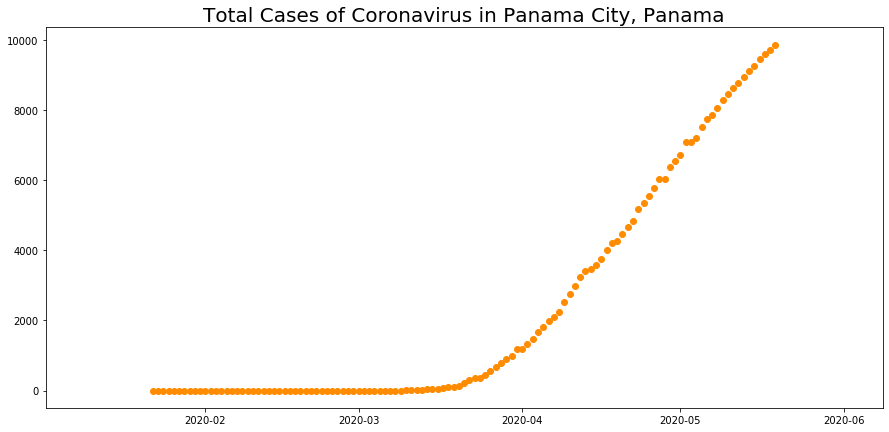

In [25]:
y = pty['Confirmed']
pty['Date'] = pd.to_datetime(pty['Date'])
x= pty['Date']


plt.figure(figsize=(15,7))
plt.scatter(x, y, color='darkorange', label='Data')
plt.title("Total Cases of Coronavirus in Panama City, Panama", fontsize=20)

In [26]:
daily_ct= pty['Confirmed'].groupby(pty['Date'].dt.to_period('D')).sum()
daily_ct.tail()

Date
2020-05-15    9268
2020-05-16    9449
2020-05-17    9606
2020-05-18    9726
2020-05-19    9867
Freq: D, Name: Confirmed, dtype: int64

In [27]:
all_dates=[]
for i in range (0,len(daily_ct.index)):
    all_dates.append(i+1)

In [28]:
total_dates = np.array(all_dates)
total_dates

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119])

In [29]:
x_train, y_train, x_test, y_test = total_dates[:112], daily_ct.values[:112],  total_dates[112:], daily_ct.values[112:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112,)
(7,)
(112,)
(7,)


In [30]:
x_tr = x_train.reshape(-1, 1)
x_t = x_test.reshape(-1,1)


In [31]:
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Fit regression models
y_lin = svr_lin.fit(x_tr, y_train).predict(x_t)
y_poly = svr_poly.fit(x_tr, y_train).predict(x_t)
y_rbf = svr_rbf.fit(x_tr, y_train).predict(x_t)

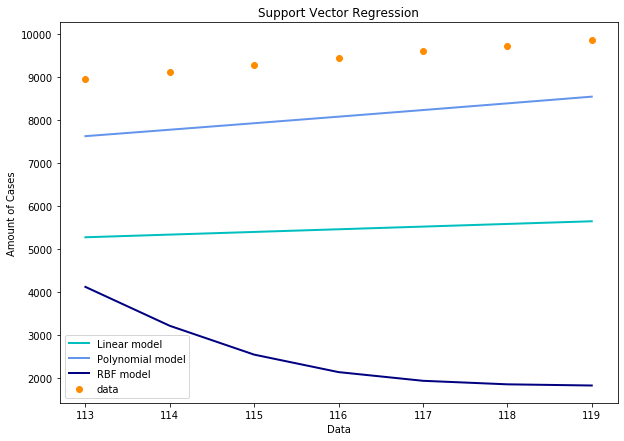

In [32]:
#Plot the results
lw = 2

plt.figure(figsize=(10,7))
plt.scatter(x_t, y_test, color='darkorange', label='data')
plt.plot(x_t, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x_t, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.plot(x_t, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Amount of Cases')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [33]:
# Now, if we try the Kernel Ridge Regression


    
ker_lin = KernelRidge(kernel='linear')
ker_poly = KernelRidge(kernel='poly', degree=2)
ker_rbf = KernelRidge(kernel='rbf', gamma=0.1)

y_ker_lin = ker_lin.fit(x_tr, y_train).predict(x_t)
y_ker_poly = ker_poly.fit(x_tr, y_train).predict(x_t)
y_ker_rbf = ker_rbf.fit(x_tr, y_train).predict(x_t)

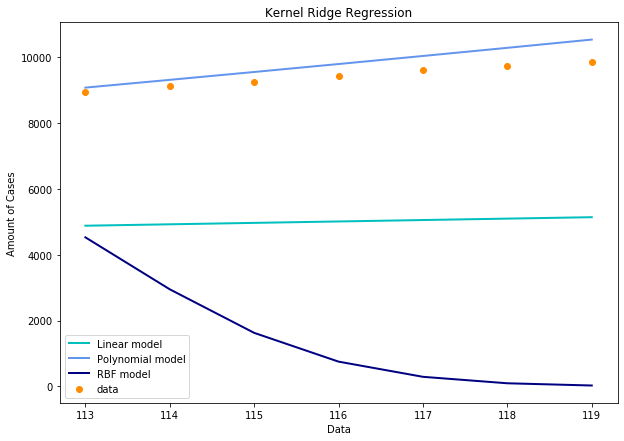

In [34]:
#Plot the results
lw = 2

plt.figure(figsize=(10,7))
plt.scatter(x_t, y_test, color='darkorange', label='data')
plt.plot(x_t, y_ker_lin, color='c', lw=lw, label='Linear model')
plt.plot(x_t, y_ker_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.plot(x_t, y_ker_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Amount of Cases')
plt.title('Kernel Ridge Regression')
plt.legend()
plt.show()

#### For this problem, I used the simplest approach, using Date as my X (in which I needed to transform to int), and my Y is the amount of Confirmed Cases in Panama. I divided the the data into train (first 112) and test (last 7 days). I then proceeded to do the SVR on my model and saw that Polynomial model is the one that performs the best compared to Linear and RBF SVR. SVR - RBF is the one that performs the worst in this case.

#### In the Kernel Ridge Regression the polynomial model is super similar to my actual data. It actually outperforms my Polynomial SVR model. The linear Kernel Ridge Regression is the second best one in the KRR, and RBF in both cases (SVR and KRR) perform the worst.

### Optimization
a) Find the points on the circle 𝑥2 + 𝑦2 = 80 which are closest to and farthest from the point (1,2). Solve
this question analytically. Hint: Use Lagrange’s method.

b) Solve the above question programmatically using a Python or R optimizer.

c) Plot the function, constraint and the solution


#### Answer for a) 

x^2 + y^2 = 80, distance = (x -1)^2 + (y -2)^2

so then we proceed to take the derivative of both equations:

2(x -1) = 2x * lambda,

2(y -2) = 2y * lambda

simplifying it a little bit:
(x-1)/x = lambda = (y-2)/y

therefore, 2x = y

If we then plot it in our equation: 
(x)^2 + (2x)^2 = 80

x^2 + 4x^2 = 80

5x^2 = 80

x^2 = 80/5 = 16

x = +/- 4

16 + y^2 = 80

y^2 = 80 -16

y^2 = 64

y = +/- 8

so we have the points:
(4 , 8)
(-4, -8)
(4, -8)
(-4, 8)

### The point that is the closest is (4 , 8) with distance of 45, and the one that is the farthest is (-4,-8) with distance of 125.


In [35]:
from scipy.optimize import minimize

In [36]:
import numpy as np

def func(X):
    x = X[0]
    y = X[1]
    L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    return (x-1)**2 + (y-2)**2 + L * (x**2 + y**2 - 80)

def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda

In [37]:
from scipy.optimize import fsolve


X_1 = fsolve(dfunc, [80, 80, 0])

print ("The closest points is: ("+ str(round(X_1[0],1))+ ","+ str(round(X_1[1],1)) +") ,with distance:"+ str(round(func(X_1),1)))

X_2 = fsolve(dfunc, [-80, -80, 0])
print ("The farthest points is: ("+ str(round(X_2[0],1))+ ","+ str(round(X_2[1],1)) +") ,with distance:"+ str(round(func(X_2),1)))

The closest points is: (4.0,8.0) ,with distance:45.0
The farthest points is: (-4.0,-8.0) ,with distance:125.0


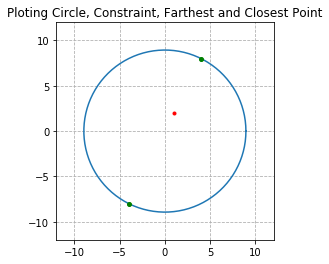

In [38]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(80)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
plt.plot(1, 2 , marker='o', markersize=3, color="red")
plt.plot(4, 8 , marker='o', markersize=4, color="green")
plt.plot(-4, -8 , marker='o', markersize=4, color="green")

ax.set_aspect(1)

plt.xlim(-12,12)
plt.ylim(-12,12)

plt.grid(linestyle='--')

plt.title('Ploting Circle, Constraint, Farthest and Closest Point', fontsize=12)

plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')

plt.show()

#### The closest point on the circle (x^2 + y^2 = 80), from the point (1,2)  is in the figure above, and is the point (4,8). The farthest point on the circle from the point (1,2)  is the point (-4, -8). the point (1,2) is in color red, and the farthest and closes point, I used color green in the figure above.